Stock Price Prediction using LSMT

In [1]:
#Loading libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

I have choosen the Meta(FB) dataset for my Stock Price Prediction

In [2]:
#Loading the dataset

data = pd.read_csv("D:\Bharat_Intern\FB.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [3]:
#Using the Open Stock Price Column to Train the model

train_set = data.iloc[:,1:2].values
print(train_set)

[[ 42.049999]
 [ 36.529999]
 [ 32.610001]
 ...
 [211.369995]
 [213.330002]
 [215.      ]]


In [4]:
print(train_set.shape)

(2479, 1)


In [5]:
#Normalising the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train_set)
print(scaled_data)

[[0.06592409]
 [0.05074257]
 [0.0399615 ]
 ...
 [0.53160066]
 [0.53699121]
 [0.54158417]]


In [24]:
#Creating X_train and y_train Datastes

X_train = []
y_train = []

for i in range (60,1258):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [25]:
#Reshaping the data

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM.

In [26]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [27]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units= 1))

Fitting the model

In [28]:
regressor.compile(optimizer= 'adam', loss= 'mean_squared_error')
regressor.fit(X_train, y_train, epochs= 20, batch_size= 32)

Epoch 1/20
38/38 [==============================] - 13s 137ms/step - loss: 0.0047
Epoch 2/20
38/38 [==============================] - 5s 141ms/step - loss: 9.2807e-04
Epoch 3/20
38/38 [==============================] - 5s 139ms/step - loss: 5.5808e-04
Epoch 4/20
38/38 [==============================] - 5s 137ms/step - loss: 4.6640e-04
Epoch 5/20
38/38 [==============================] - 5s 143ms/step - loss: 5.0336e-04
Epoch 6/20
38/38 [==============================] - 5s 136ms/step - loss: 4.3770e-04
Epoch 7/20
38/38 [==============================] - 5s 132ms/step - loss: 4.6789e-04
Epoch 8/20
38/38 [==============================] - 5s 138ms/step - loss: 4.4274e-04
Epoch 9/20
38/38 [==============================] - 5s 140ms/step - loss: 4.1499e-04
Epoch 10/20
38/38 [==============================] - 5s 138ms/step - loss: 3.9447e-04
Epoch 11/20
38/38 [==============================] - 5s 141ms/step - loss: 3.7967e-04
Epoch 12/20
38/38 [==============================] - 5s 139ms/step

Extracting the actual stock prices of April 2022 

In [29]:
data = pd.read_csv("D:\Bharat_Intern\FB.csv")
actual_stock_price = data.iloc[:,1:2].values
print(actual_stock_price)

[[ 42.049999]
 [ 36.529999]
 [ 32.610001]
 ...
 [211.369995]
 [213.330002]
 [215.      ]]


Preparing the input for the model

In [30]:
data_total = pd.concat((data['Open'], data['Open']), axis= 0)
inputs = data_total[len(data_total) - len(data) - 60:]

inputs = inputs.values.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test)

[[[0.90437297]
  [0.89636965]
  [0.89367435]
  ...
  [0.53160066]
  [0.53699121]
  [0.54158417]]

 [[0.89636965]
  [0.89367435]
  [0.88069305]
  ...
  [0.53699121]
  [0.54158417]
  [0.06592409]]

 [[0.89367435]
  [0.88069305]
  [0.88523107]
  ...
  [0.54158417]
  [0.06592409]
  [0.05074257]]

 ...

 [[0.76941695]
  [0.77522007]
  [0.79463701]
  ...
  [0.02329483]
  [0.0250275 ]
  [0.02585259]]

 [[0.77522007]
  [0.79463701]
  [0.76916943]
  ...
  [0.0250275 ]
  [0.02585259]
  [0.02634764]]

 [[0.79463701]
  [0.76916943]
  [0.76331133]
  ...
  [0.02585259]
  [0.02634764]
  [0.02632013]]]


C:\Users\DELL\AppData\Local\Temp\ipykernel_21984\3024995533.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = data_total[len(data_total) - len(data) - 60:]


Predicting the Values for April 2022 Stock Prices

In [32]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

1/1 [==============================] - 0s 70ms/step
[[200.89114 ]
 [200.7063  ]
 [199.56966 ]
 [196.93198 ]
 [192.4785  ]
 [186.13791 ]
 [178.03569 ]
 [168.43224 ]
 [157.66228 ]
 [146.09572 ]
 [134.10747 ]
 [122.045006]
 [110.2127  ]
 [ 98.86248 ]
 [ 88.19557 ]
 [ 78.35815 ]
 [ 69.44729 ]
 [ 61.514736]
 [ 54.572887]
 [ 48.600986]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


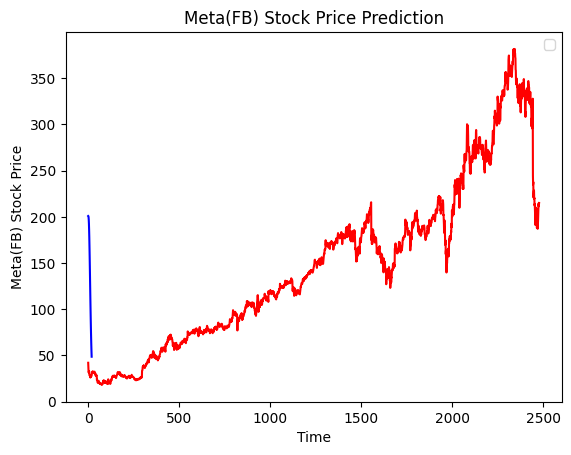

In [36]:
from matplotlib.lines import Line2D
plt.plot(actual_stock_price, color = 'red' )
plt.plot(predicted_stock_price, color ='blue')
plt.title('Meta(FB) Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Meta(FB) Stock Price')
plt.legend()